### TimeSeries
+ 서울시 코로나19 시계열 분석
+ x : 날짜(확진일), y : 날짜별 확진자

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 확인

In [3]:
plt.rc("font", family="Malgun Gothic")

In [9]:
covid19 = pd.read_csv("../data/seoul_covid19.csv")
covid19

C:\Users\SW\AppData\Local\Temp\ipykernel_8272\2557537514.py:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  covid19 = pd.read_csv("../data/seoul_covid19.csv")


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


<Axes: xlabel='확진일'>

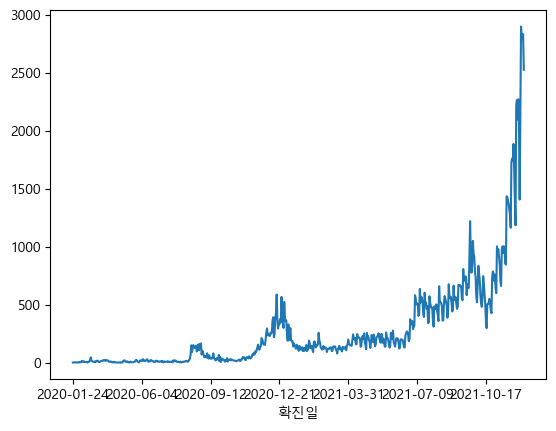

In [10]:
covid19.groupby("확진일")["연번"].count().plot()

# bar chart
# covid19.groupby("확진일")["연번"].count().plot(kind="bar")

#### 데이터 전처리

In [12]:
covid19["지역"].unique()

array(['기타', '성북구', '중구', '광진구', '종로구', '중랑구', '강동구', '강북구', '노원구',
       '서대문구', '금천구', '송파구', '은평구', '성동구', '동작구', '양천구', '관악구', '구로구',
       '용산구', '강남구', '도봉구', '동대문구', '서초구', '강서구', '마포구', '영등포구', '타시도',
       '송파구 ', '서초구 ', '송파', '관악구 ', '동대문', '영등포', '서대문', '마포구 '],
      dtype=object)

In [13]:
covid19.loc[covid19["지역"]=="관악구 "]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
1428,181130,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1464,181094,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1774,180784,2021-12-11,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
12155,170403,2021-12-07,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [15]:
covid19["지역"] = covid19["지역"].apply(lambda x: x.strip())

In [17]:
covid19.loc[covid19["지역"]=="관악구"]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
40,182518,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
51,182507,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
70,182488,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
91,182467,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
200,182358,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182440,118,2020-03-07,6845.0,NaN,510419-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182471,87,2020-02-29,3491.0,NaN,690602-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182484,74,2020-02-28,2466.0,NaN,700817-1,관악구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182505,53,2020-02-26,1295.0,NaN,800216-1,관악구,NaN,타시도 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


In [18]:
target = ["동대문", "서대문", "송파", "영등포"]

In [21]:
covid19["지역"] = covid19["지역"].apply(lambda x: x + "구" if x in target else x)

In [22]:
covid19["지역"]

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [25]:
covid19.groupby("확진일")["연번"].count()
type(covid19.groupby("확진일")["연번"].count())

pandas.core.series.Series

In [27]:
# 데이터프레임화
covid19_df = covid19.groupby("확진일")["연번"].count().reset_index()
type(covid19_df)

pandas.core.frame.DataFrame

#### prophet 사용해서 예측

In [29]:
from prophet import Prophet

d:\HJ\Data-Analysis-Practice\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
covid19_df.columns = ["ds", "y"]
covid19_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [59]:
m = Prophet(changepoint_prior_scale=0.5)
m.fit(covid19_df)

17:52:04 - cmdstanpy - INFO - Chain [1] start processing
17:52:04 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
681,2022-01-06
682,2022-01-07
683,2022-01-08
684,2022-01-09
685,2022-01-10


In [61]:
# 예측하기
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
681,2022-01-06,1803.000118,1605.093563,2060.975426,1780.794391,1825.322053,26.831726,26.831726,26.831726,26.831726,26.831726,26.831726,0.0,0.0,0.0,1829.831844
682,2022-01-07,1812.671099,1619.793237,2068.747882,1788.883864,1836.373800,22.711230,22.711230,22.711230,22.711230,22.711230,22.711230,0.0,0.0,0.0,1835.382329
683,2022-01-08,1822.342080,1568.764912,2065.408986,1796.451406,1847.656441,-3.125405,-3.125405,-3.125405,-3.125405,-3.125405,-3.125405,0.0,0.0,0.0,1819.216675
684,2022-01-09,1832.013061,1540.900321,2016.114950,1803.952195,1859.131392,-59.768321,-59.768321,-59.768321,-59.768321,-59.768321,-59.768321,0.0,0.0,0.0,1772.244740
685,2022-01-10,1841.684042,1555.319603,2019.462779,1812.951638,1870.381916,-56.113970,-56.113970,-56.113970,-56.113970,-56.113970,-56.113970,0.0,0.0,0.0,1785.570072


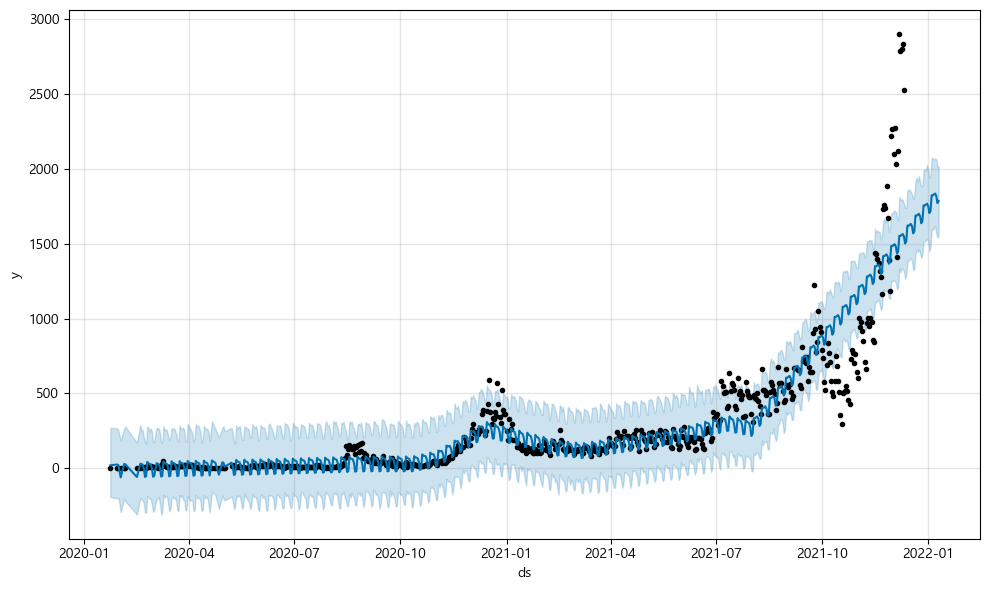

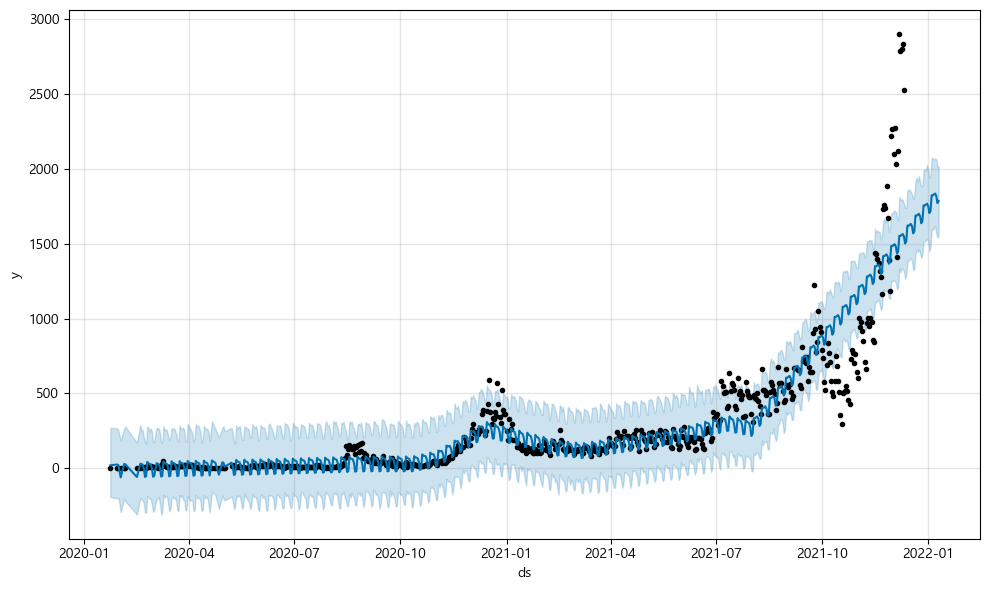

In [62]:
# 데이터 시각화
# 원본데이터의 경향성이 붙어야함
# Prophet(changepoint_prior_scale=1)의 scale 조정하면서 보기
m.plot(forecast)

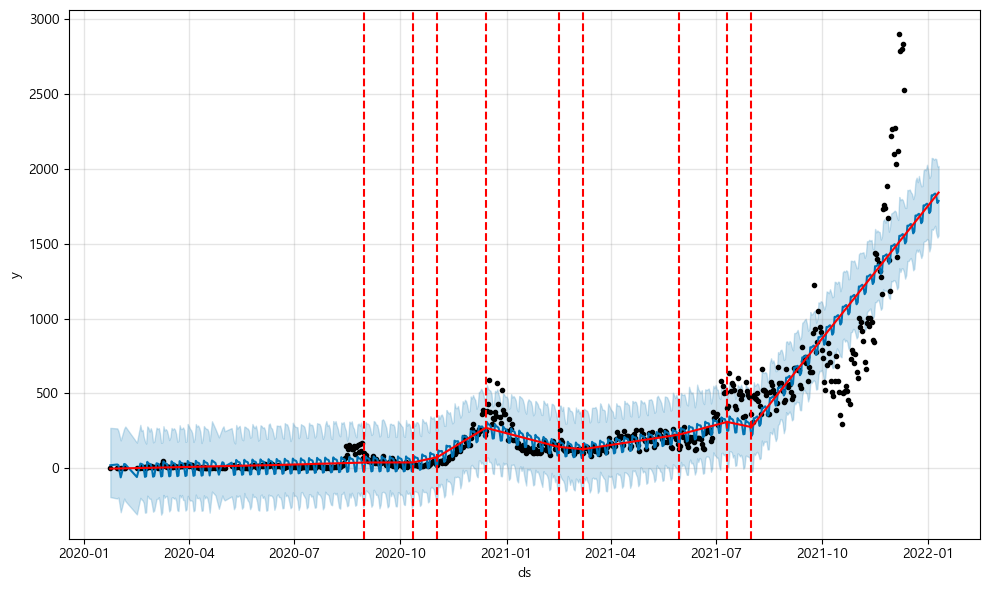

In [63]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)